In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.shape

(614, 13)

In [4]:
df_test.shape

(367, 12)

In [5]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#checking for missing values
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


In [7]:
#fill missing values
df_train['Gender'] = df_train['Gender'].fillna(
df_train['Gender'].dropna().mode().values[0] )
df_train['Married'] = df_train['Married'].fillna(
df_train['Married'].dropna().mode().values[0] )
df_train['Dependents'] = df_train['Dependents'].fillna(
df_train['Dependents'].dropna().mode().values[0] )
df_train['Self_Employed'] = df_train['Self_Employed'].fillna(
df_train['Self_Employed'].dropna().mode().values[0] )
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(
df_train['LoanAmount'].dropna().median() )
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(
df_train['Loan_Amount_Term'].dropna().mode().values[0] )
df_train['Credit_History'] = df_train['Credit_History'].fillna(
df_train['Credit_History'].dropna().mode().values[0] )


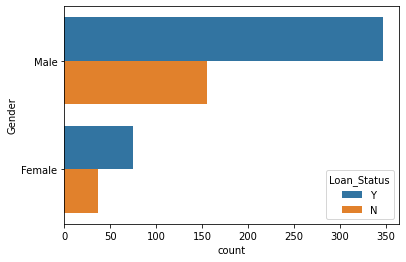

In [8]:
sns.countplot(y='Gender', hue='Loan_Status', data=df_train)

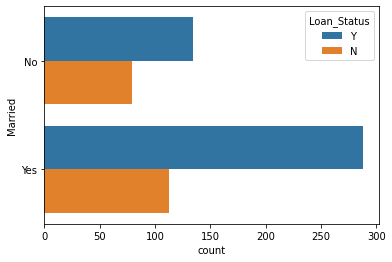

In [9]:
sns.countplot(y='Married', hue='Loan_Status', data=df_train)

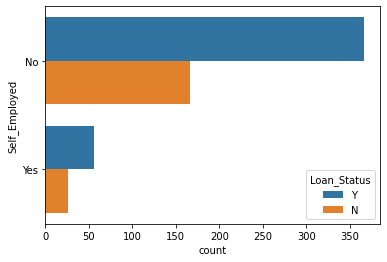

In [10]:
sns.countplot(y='Self_Employed', hue='Loan_Status', data=df_train)

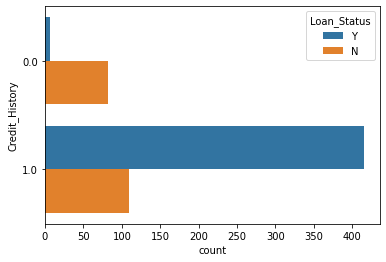

In [11]:
sns.countplot(y='Credit_History', hue='Loan_Status', data=df_train)

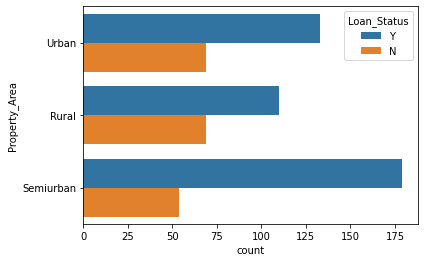

In [12]:
sns.countplot(y='Property_Area', hue='Loan_Status', data=df_train)

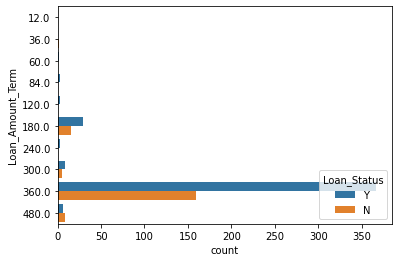

In [13]:
sns.countplot(y='Loan_Amount_Term', hue='Loan_Status', data=df_train)

#### An extremely high number of them go for a 360 cyclic loan term. That's payback within a year.

/home/sanjukta/anaconda/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


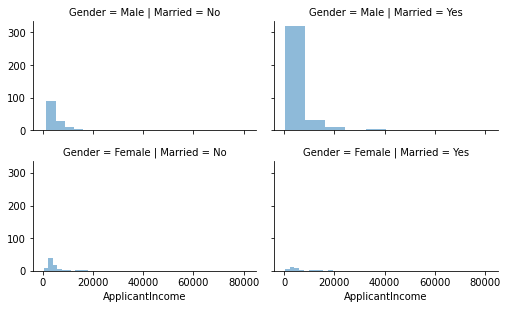

In [14]:
grid = sns.FacetGrid(df_train,row='Gender',col='Married', size=2.2, aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5, bins=10)
grid.add_legend()

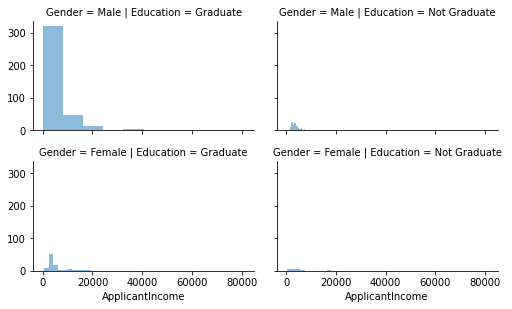

In [15]:
grid = sns.FacetGrid(df_train,row='Gender',col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5, bins=10)
grid.add_legend()

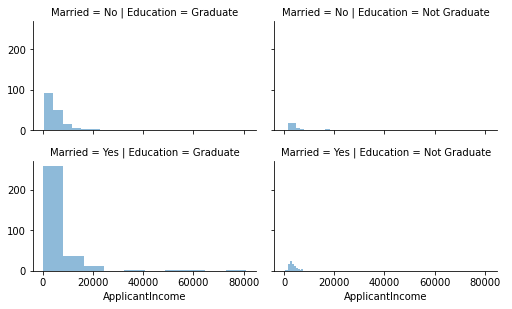

In [16]:
grid = sns.FacetGrid(df_train,row='Married',col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5, bins=10)
grid.add_legend()

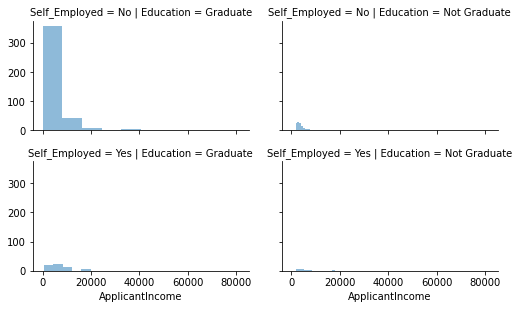

In [17]:
grid = sns.FacetGrid(df_train,row='Self_Employed',col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5, bins=10)
grid.add_legend()

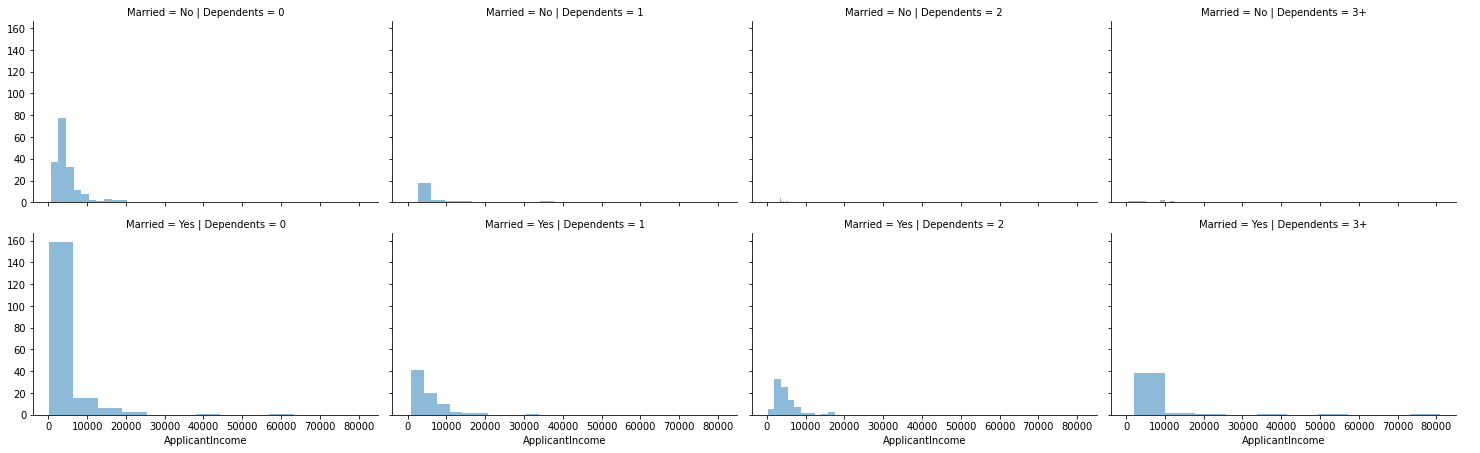

In [18]:
grid = sns.FacetGrid(df_train,row='Married',col='Dependents', size=3.2, aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5, bins=10)
grid.add_legend()

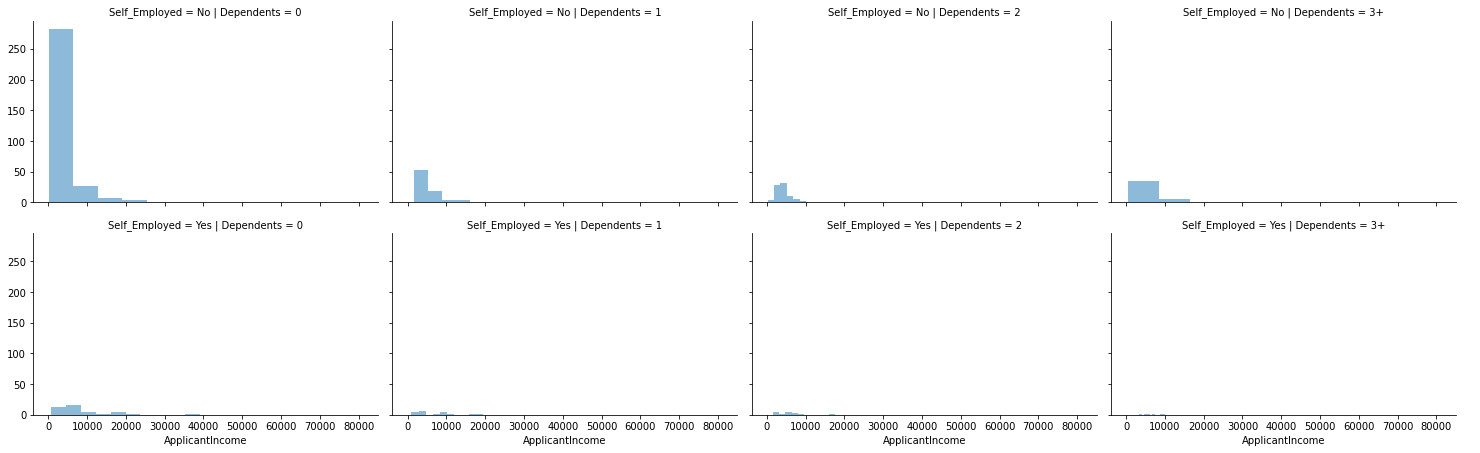

In [19]:
grid = sns.FacetGrid(df_train,row='Self_Employed',col='Dependents', size=3.2, aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5, bins=10)
grid.add_legend()

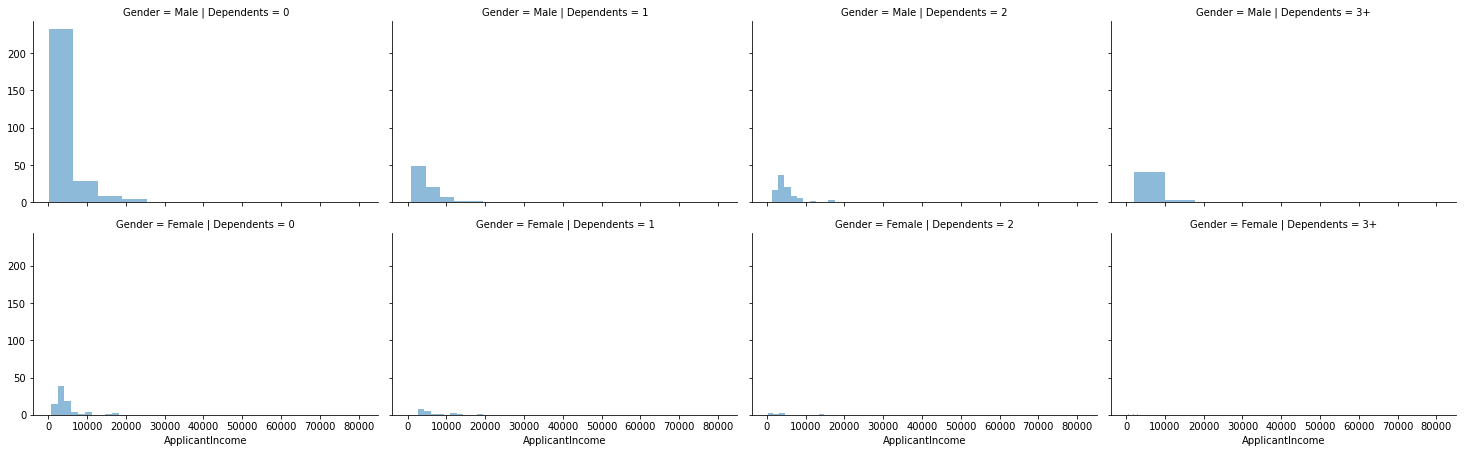

In [20]:
grid = sns.FacetGrid(df_train,row='Gender',col='Dependents', size=3.2, aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5, bins=10)
grid.add_legend()

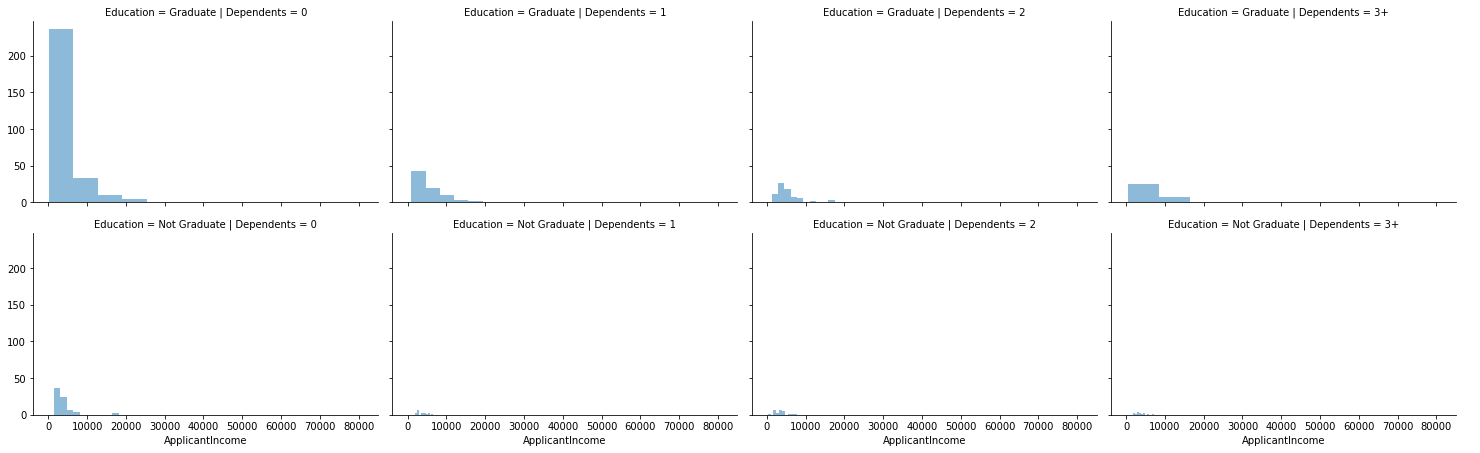

In [21]:
grid = sns.FacetGrid(df_train,row='Education',col='Dependents', size=3.2, aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5, bins=10)
grid.add_legend()

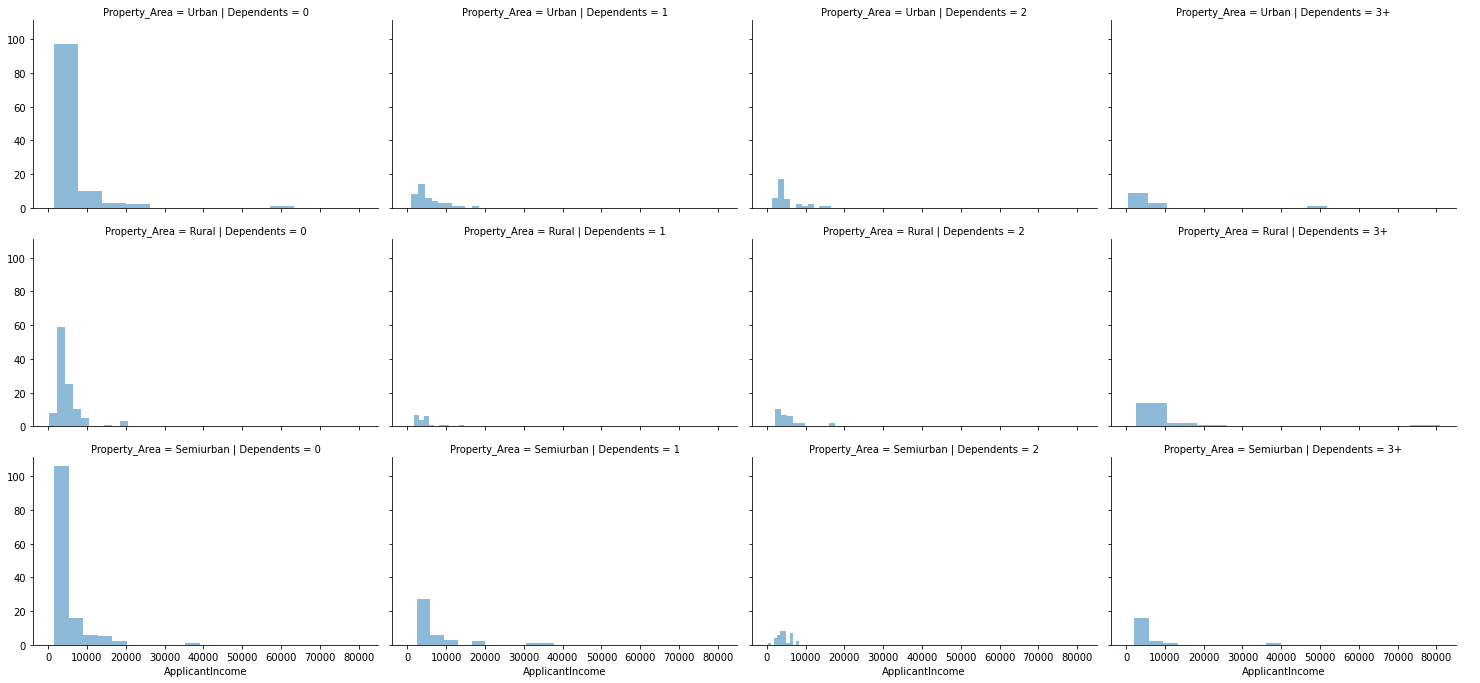

In [22]:
grid = sns.FacetGrid(df_train,row='Property_Area',col='Dependents', size=3.2, aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5, bins=10)
grid.add_legend()

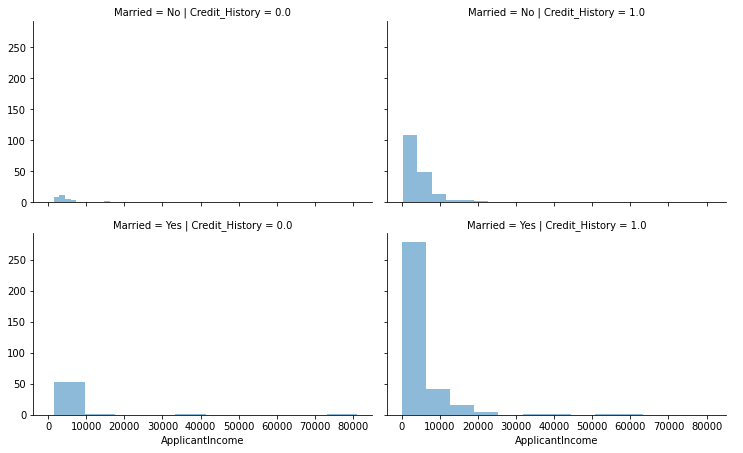

In [23]:
grid = sns.FacetGrid(df_train,row='Married',col='Credit_History', size=3.2, aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5, bins=10)
grid.add_legend()

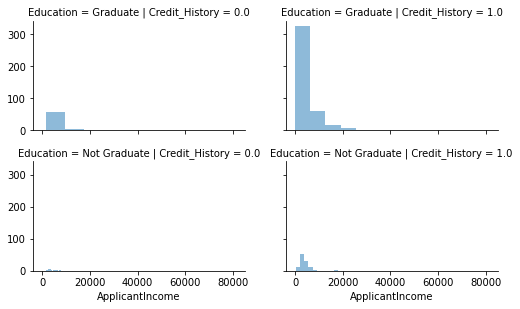

In [24]:
grid = sns.FacetGrid(df_train,row='Education',col='Credit_History', size=2.2, aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5, bins=10)
grid.add_legend()

#### Educated with good credit history depicts a good income. Also, not a graduate and a good credit history 
#### can be traced to have a better income than a fellow with no degree

### Encoding to numeric data; getting ready for training

In [25]:
code_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2, 'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}

In [26]:
df_train = df_train.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
df_test = df_test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)

In [27]:
#drop the uniques loan id
df_train.drop('Loan_ID', axis = 1, inplace = True)
df_train['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null object
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
dtypes: float64(4), int64(7), object(1)
memory usage: 57.7+ KB


In [29]:
Dependents_ = pd.to_numeric(df_train.Dependents)
Dependents__ = pd.to_numeric(df_test.Dependents)

In [30]:
df_train.drop(['Dependents'], axis = 1, inplace = True)
df_test.drop(['Dependents'], axis = 1, inplace = True)

In [31]:
df_train = pd.concat([df_train, Dependents_], axis = 1)
df_test = pd.concat([df_test, Dependents__], axis = 1)

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null int64
Married              614 non-null int64
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
Dependents           614 non-null int64
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


##### converted successfully

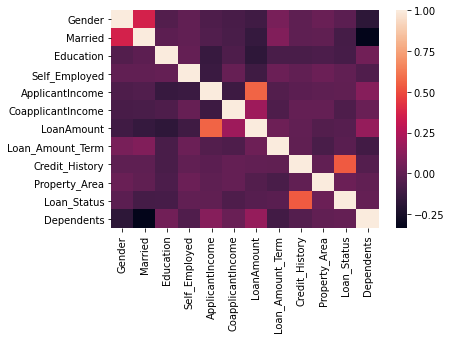

In [33]:
sns.heatmap(df_train.corr())

#### Heatmap showing the correlations of features with the target. No correlations are extremely high. 
#### The correlations between LoanAmount and ApplicantIncome can be explained

### Separating Target from the feature for training

In [34]:
y = df_train['Loan_Status']

X = df_train.drop('Loan_Status', axis = 1)


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [36]:
import numpy as np
def data_split(data,ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size=int(len(data)*ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [37]:
np.random.permutation(7)

array([0, 4, 1, 2, 3, 6, 5])

In [38]:
X

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents
0,1,2,1,2,5849,0.0,128.0,360.0,1.0,3,0
1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,1
2,1,1,1,1,3000,0.0,66.0,360.0,1.0,3,0
3,1,1,2,2,2583,2358.0,120.0,360.0,1.0,3,0
4,1,2,1,2,6000,0.0,141.0,360.0,1.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...
609,2,2,1,2,2900,0.0,71.0,360.0,1.0,1,0
610,1,1,1,2,4106,0.0,40.0,180.0,1.0,1,3
611,1,1,1,2,8072,240.0,253.0,360.0,1.0,3,1
612,1,1,1,2,7583,0.0,187.0,360.0,1.0,3,2


In [40]:
train,test = data_split(df_train, 0.2)

In [41]:
train

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
333,1,1,1,2,63337,0.0,490.0,180.0,1.0,3,1,0
83,1,1,1,2,6000,2250.0,265.0,360.0,1.0,2,0,0
90,1,1,1,2,2958,2900.0,131.0,360.0,1.0,2,1,0
227,1,1,1,2,6250,1695.0,210.0,360.0,1.0,2,1,2
482,1,1,1,2,2083,3150.0,128.0,360.0,1.0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,1,2,1,1875,1875.0,97.0,360.0,1.0,2,1,2
106,1,1,1,2,11417,1126.0,225.0,360.0,1.0,3,1,2
270,2,2,1,2,3237,0.0,30.0,360.0,1.0,3,1,0
435,2,1,1,2,10047,0.0,128.0,240.0,1.0,2,1,0


In [42]:
test

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
350,1,1,1,2,9083,0.0,228.0,360.0,1.0,2,1,0
377,1,1,1,2,4310,0.0,130.0,360.0,1.0,2,1,0
163,1,1,1,2,4167,1447.0,158.0,360.0,1.0,1,1,2
609,2,2,1,2,2900,0.0,71.0,360.0,1.0,1,1,0
132,1,2,1,2,2718,0.0,70.0,360.0,1.0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
118,1,1,1,2,5568,2142.0,175.0,360.0,1.0,1,0,0
231,1,1,1,2,3716,0.0,42.0,180.0,1.0,1,1,0
312,2,2,1,2,2507,0.0,56.0,360.0,1.0,1,1,0
248,1,1,1,2,2882,1843.0,123.0,480.0,1.0,2,1,1


In [44]:
X_train = train[['Gender','Married','Education','Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Dependents'  ]].to_numpy()
X_test = test[['Gender','Married','Education','Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Dependents' ]].to_numpy()

In [45]:
Y_train = train[['Loan_Status']].to_numpy().reshape(492,)
Y_test = test[['Loan_Status']].to_numpy().reshape(122,) 

In [46]:
#y=pd.to_numeric(df_train.Loan_Status)
Y_train

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,

### Using Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, Y_train)
import pickle
file = open('loan.pkl', 'wb')


pickle.dump(model, file)

# close the file
file.close()



In [49]:
inputFeatures=[1,1,1,2,9083, 1447, 228, 360, 1, 2, 0]
infProb=model.predict_proba([inputFeatures])[0][1]

In [50]:
infProb

0.8193195314721318

In [ ]:
ypred = model.predict(X_test)
ypred

In [ ]:
evaluation = f1_score(y_test, ypred)
evaluation

### Using Decision Tree

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

In [ ]:
ypred_tree = tree.predict(X_test)
ypred_tree

In [ ]:
evaluation_tree = f1_score(y_test, ypred_tree)
evaluation_tree

### Using Random Forest Classifier

In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

In [ ]:
ypred_forest = forest.predict(X_test)
ypred_forest

In [ ]:
evaluation_forest = f1_score(y_test, ypred_forest)
evaluation_forest

### Conclusion

#### From the Exploratory Data Analysis, we could generate insight from the data.
#### How each of the features relates to the target. Also, it can be seen from the evaluation of three models
#### that Logistic Regression performed better than others, Random Forest did better than Decision Tree.